In [1]:
#Import IBI data as csv into a list
import csv

folder = r"C:\Users\damie\Documents\Erica\Empatica Sample data\HRV_analysis_test"

with open(folder + '\Sample_IBI.csv', newline='') as f:
    for row in f:
        list2 = [row.split(',')[1] for row in f]

print("Imported list:")
print(list2)

converted_list = []

for element in list2:
    converted_list.append(element.strip())
print("converted_list Stripped:")
print(converted_list)

converted_list_int = converted_list
for i in range(0, len(converted_list)):
    converted_list[i] = float(converted_list[i])*1000
    #converted_list_int[i] = int(converted_list[i])*1000
print("converted_list:")
print(converted_list)

print("converted_list_int:")
print(converted_list_int)

Imported list:
['0.875040\n', '0.875040\n', '0.968794\n', '0.781286\n', '0.796911\n', '0.828163\n', '0.968794\n', '0.812537\n', '0.812537\n', '0.843789\n', '0.921917\n', '0.843789\n', '0.906291\n', '0.875040\n', '0.921917\n', '0.812537\n', '0.859414\n', '0.859414\n', '0.859414\n', '0.796911\n', '0.875040\n', '0.875040\n', '0.968794\n', '0.796911\n', '0.875040\n', '0.875040\n', '0.984420\n', '0.828163\n', '0.906291\n', '0.921917\n', '0.906291\n', '0.953169\n', '0.859414\n', '0.734409\n', '0.765660\n', '0.906291\n', '0.781286\n', '0.781286\n', '0.812537\n', '0.859414\n', '0.968794\n', '0.781286\n', '0.937543\n', '1.109426\n', '0.671906\n', '0.828163\n', '0.890666\n', '0.796911\n', '0.781286\n', '0.937543\n', '0.703157\n', '0.750034\n', '0.609403\n', '0.718783\n', '0.859414\n', '0.921917\n', '0.984420\n', '0.875040\n', '0.859414\n', '0.843789\n', '1.000046\n', '0.875040\n', '0.640654\n', '0.687531\n', '0.625029\n', '0.640654\n', '0.656280\n', '0.640654\n', '0.625029\n', '0.656280\n', '0.9

0 outlier(s) have been deleted.
10 ectopic beat(s) have been deleted with malik rule.


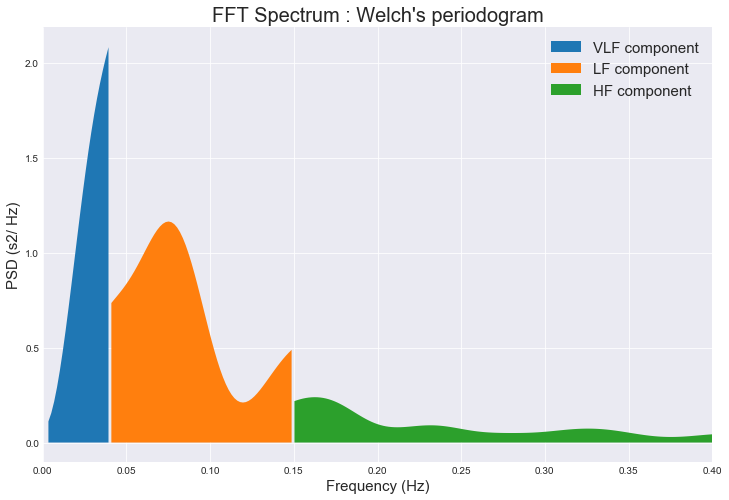

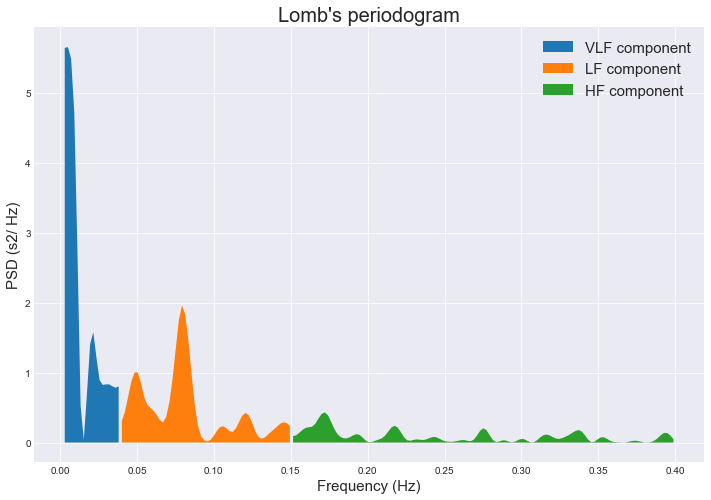

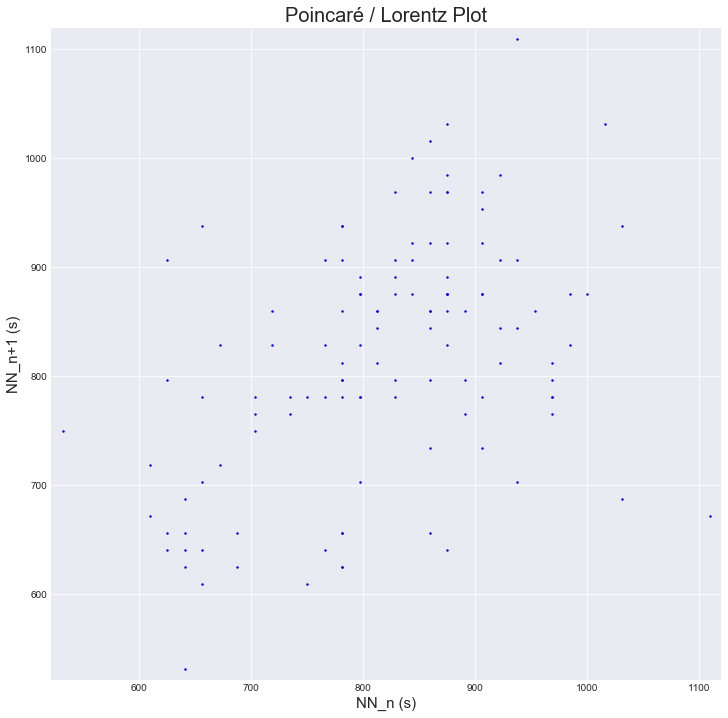

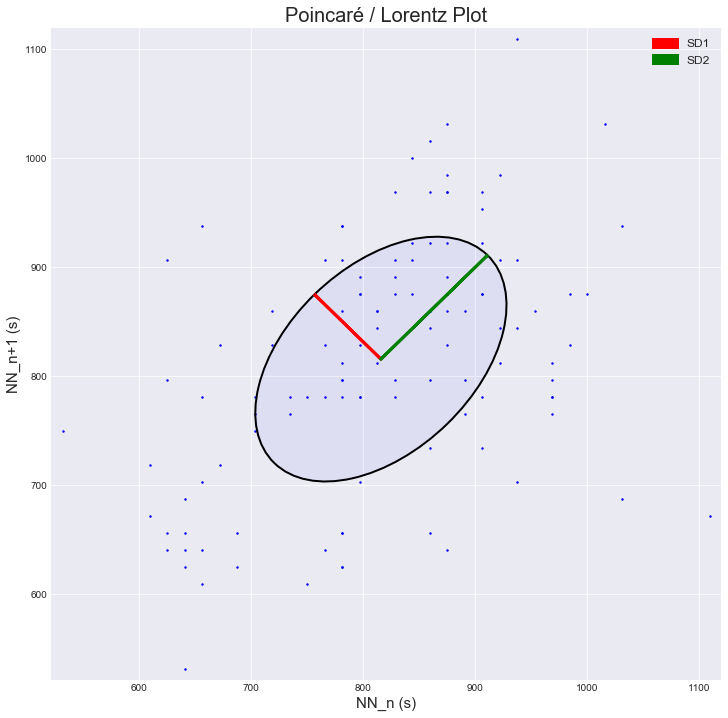

max and min :
1109.426 531.274


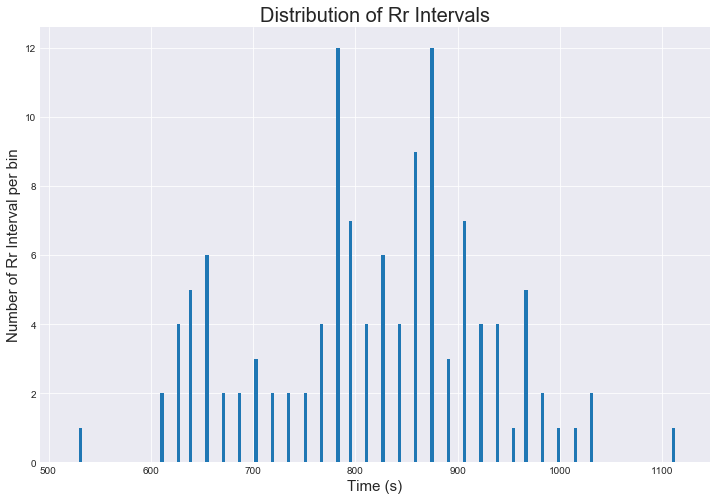

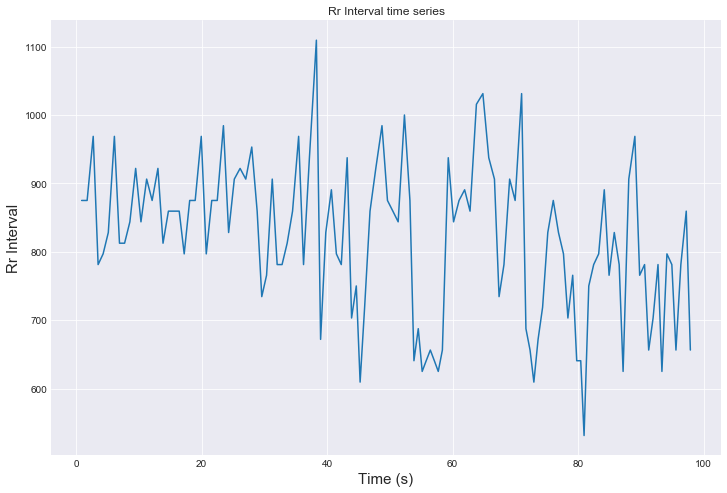

In [4]:
%matplotlib inline

from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values
from hrvanalysis import plot_psd, plot_distrib
from hrvanalysis import plot_poincare
from hrvanalysis import plot_distrib
from hrvanalysis import plot_timeseries

# rr_intervals_list contains integer values of RR-interval
#rr_intervals_list = [1000, 1050, 1020, 1080, 1100, 1110, 1060]
rr_intervals_list = converted_list

# This remove outliers from signal
rr_intervals_without_outliers = remove_outliers(rr_intervals=rr_intervals_list, low_rri=300, high_rri=2000)
# This replace outliers nan values with linear interpolation
interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers, 
                                                   interpolation_method="linear")

# This remove ectopic beats from signal
nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
# This replace ectopic beats nan values with linear interpolation
interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)

# nn_intervals_list contains integer values of NN-interval
nn_intervals_list = converted_list

## PLOT PERIODOGRAMS
plot_psd(nn_intervals_list, method="welch")
plot_psd(nn_intervals_list, method="lomb")

## POINTCARE PLOTS
plot_poincare(nn_intervals_list, plot_sd_features=False)
plot_poincare(nn_intervals_list, plot_sd_features=True)

## PLOT DISTRIBUTION
plot_distrib(nn_intervals_list,bin_length = 4)

## PLOT TIME SERIES
plot_timeseries(nn_intervals_list)

In [5]:
from hrvanalysis import *
 
# nn_intervals_list contains integer values of NN-interval
nn_intervals_list = converted_list

time_domain_features = get_time_domain_features(nn_intervals_list)
geometrical_features = get_geometrical_features(nn_intervals_list)
frequency_domain_features = get_frequency_domain_features(nn_intervals_list)
csi_cvi_features = get_csi_cvi_features(nn_intervals_list)
poincare_plot_features = get_poincare_plot_features(nn_intervals_list)
sampen = get_sampen(nn_intervals_list)

In [6]:
time_domain_features

{'mean_nni': 815.6622583333334,
 'sdnn': 111.72035153912262,
 'sdsd': 117.42542140109936,
 'nni_50': 70,
 'pnni_50': 58.8235294117647,
 'nni_20': 96,
 'pnni_20': 80.67226890756302,
 'rmssd': 117.43981015471911,
 'median_nni': 828.163,
 'range_nni': 578.1519999999999,
 'cvsd': 0.14398092955126712,
 'cvnni': 0.13696888681278951,
 'mean_hr': 75.03061221631664,
 'max_hr': 112.93607441734397,
 'min_hr': 54.08202079273426,
 'std_hr': 10.944053168518527}

In [7]:
geometrical_features

{'triangular_index': 10.0, 'tinn': None}

In [8]:
frequency_domain_features

{'lf': 4958.879510369653,
 'hf': 3492.5064233450967,
 'lf_hf_ratio': 1.419862674331197,
 'lfnu': 58.675340935353674,
 'hfnu': 41.324659064646326,
 'total_power': 9488.276725794176,
 'vlf': 1036.8907920794265}

In [9]:
csi_cvi_features

{'csi': 1.6094527891979642,
 'cvi': 5.252957437727004,
 'Modified_csi': 863.9648656561857}

In [10]:
poincare_plot_features

{'sd1': 83.38340132133423,
 'sd2': 134.2016478294346,
 'ratio_sd2_sd1': 1.6094527891979642}

In [11]:
sampen

{'sampen': 1.8794650496471605}